## SMS Spam Classifier using Multinomial Naive Bayes Algorithm.

In [44]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/digant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/digant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
ps = PorterStemmer()
corpus = []
df = pd.read_csv("SMSSpamCollection.txt",sep='\t',names=['label','message'])

In [46]:
df['orig_msg'] = df.message.copy()

In [47]:
df['message'].replace(to_replace="[^a-zA-Z]",value=" ",regex=True,inplace=True)

In [48]:
df['message'] = df['message'].str.lower()

In [49]:
df.head()

,label,message,orig_msg
0,ham,go until jurong point crazy available only ...,"Go until jurong point, crazy.. Available only ..."
1,ham,ok lar joking wif u oni,Ok lar... Joking wif u oni...
2,spam,free entry in a wkly comp to win fa cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,u dun say so early hor u c already then say,U dun say so early hor... U c already then say...
4,ham,nah i don t think he goes to usf he lives aro...,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
# ps.stem(df.message[0])
df.message[0]


'go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   '

In [51]:
df['tokenized'] = df.message.apply(word_tokenize)

In [52]:
stop = stopwords.words('english')
df['tokenized'] = df['tokenized'].apply(lambda x: [ps.stem(item) for item in x if item not in stop])

In [53]:
df['tokenized'] = df['tokenized'].apply(lambda x: " ".join(x)) 

In [54]:
df.tokenized.values

array(['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
       'ok lar joke wif u oni',
       'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
       ..., 'piti mood suggest',
       'guy bitch act like interest buy someth els next week gave us free',
       'rofl true name'], dtype=object)

In [55]:
cv = CountVectorizer()
X = cv.fit_transform(df.tokenized.values).toarray()
y = pd.get_dummies(df.label)

In [56]:
y = y.iloc[:,1].values

In [57]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=0)

## MultinomialNB Classifier

In [58]:
spam_detector_model = MultinomialNB().fit(x_train,y_train)

In [59]:
y_pred = spam_detector_model.predict(x_test)

In [60]:
mean_squared_error(y_test,y_pred)

0.02062780269058296

In [61]:
accuracy_score(y_test,y_pred)

0.979372197309417

In [62]:
print(classification_report(y_test,y_pred))

precision    recall  f1-score   support

           0       0.99      0.98      0.99       955
           1       0.91      0.95      0.93       160

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [63]:
df_ham = df[df['label'] == "ham"].orig_msg.replace(to_replace="[^a-zA-Z]",value=" ",regex=True).str.lower()
df_spam = df[df['label'] == "spam"].orig_msg.replace(to_replace="[^a-zA-Z]",value=" ",regex=True).str.lower()



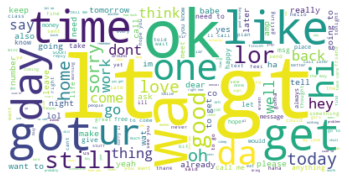

In [64]:
wordcloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(stop)).generate(df_ham.str.cat(sep=" "))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

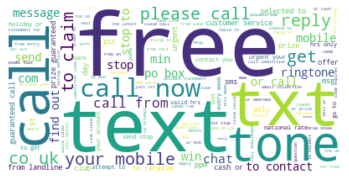

In [65]:
wordcloud_spam = WordCloud(background_color = "white", max_words = 200, stopwords = set(stop)).generate(df_spam.str.cat(sep=" "))
plt.figure()
plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.axis("off")
plt.show()

In [70]:
spam_classifier_variables = {
    'countVectorizer':cv,
    'spam_detector_model':spam_detector_model
}

In [71]:
import pickle

file = open("spam_classifier_variables.pkl",'wb')

pickle.dump(spam_classifier_variables,file)
file.close()

In [77]:
import re 


input_text = "Hello I would like to ds 54545 know some things from you !"


In [79]:
input_text = re.sub("[^a-zA-Z]"," ",input_text)
input_text = input_text.lower()
input_txt_tokens = word_tokenize(input_text)
stop = stopwords.words('english')
stemmed_words = [ps.stem(item) for item in input_txt_tokens if item not in stop]
joined_text = " ".join(stemmed_words)
modded_text = cv.transform([joined_text]).toarray()